In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim


In [2]:
class Perceptron(nn.Module):
    """ A perceptron is one linear layer"""
    def __init__(self, input_dim):
        """
        Args:
            input_dim (int): The number of input features.
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)
    def forward(self, x_in):
        """The forward pass of the perceptron.
        Args:
            x_in (torch.Tensor): an input data tensor x_in.shape should be (batch, num_features).
            Returns: the resulting tensor. tensor.shape should be (batch, )."""
        return torch.sigmoid(self.fc1(x_in)).squeeze()

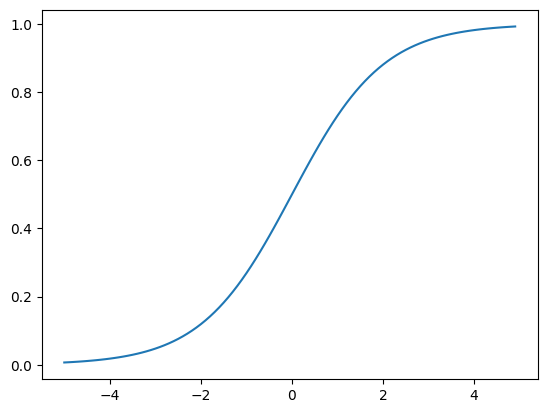

In [3]:
x = torch.arange(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

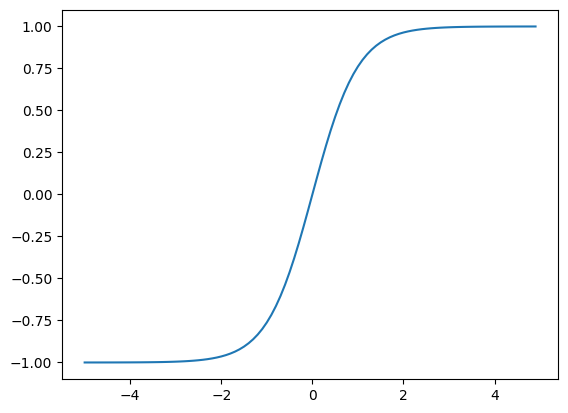

In [4]:
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

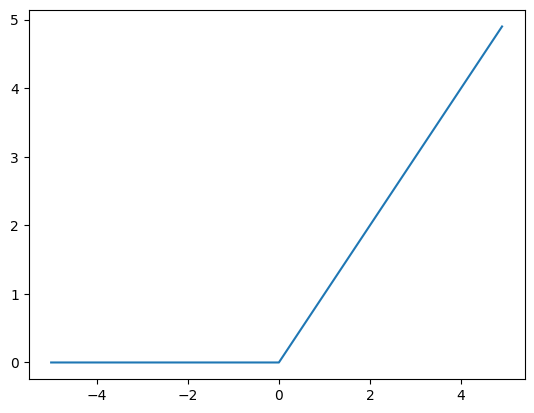

In [5]:
relu = torch.nn.ReLU()
x = torch.arange(-5., 5., 0.1)
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

### Softmax

In [6]:
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[-0.6236, -1.4103,  0.7991]])
tensor([[0.1784, 0.0813, 0.7403]])
tensor([1.])


### Loss Functions (MSE)

In [7]:
mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(3.0604, grad_fn=<MseLossBackward0>)


#### Cross-entropy loss

In [8]:
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
print(loss)

tensor(3.2334, grad_fn=<NllLossBackward0>)


#### Binary Cross-Entropy Loss

In [9]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)

print(probabilities)
print(loss)


tensor([[0.7250],
        [0.5238],
        [0.2328],
        [0.7679]], grad_fn=<SigmoidBackward0>)
tensor(0.9953, grad_fn=<BinaryCrossEntropyBackward0>)


#### « Instantiating the Adam optimizer

In [11]:
input_dim = 2
lr = 0.001

percetrons = Perceptron(input_dim=input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params=percetrons.parameters(), lr=lr)

#### A supervised training loop for a perceptron and binary classification

In [12]:
# each epoch is a complete pass over the training data 
for epoch_i in range(n_epochs):
    # the inner loop is over the batches in the dataset
    for batch_i in range(n_batches):
        # Step 0: Get the data
        x_data, y_data = get_toy_data(batch_size)

        # Step 1: Clear the gradients
        percetrons.zero_grad()

        # Step 2: Compute the forward pass of the model
        y_pred = percetrons(x_data, apply_sigmoid=True)
        # Step 3: Compute the loss value that we wish to optimize
        loss = bce_loss(y_pred, y_data)

        # Step 4: Propagate the loss signal backward
        loss.backward()

        # Step 5: Trigger the optimizer to perform one update
        optimizer.step()

NameError: name 'n_epochs' is not defined